a) Przekształcenia danych:
Zbiór danych: bikes.csv
Treść zadań:
1. Posortuj dane po dacie
2. Stwórz nowe kolumny:
- Dzień tygodnia
- Miesiąc
- Pora roku
- Kwartał
- Niedziele handlowe
3. Oblicz średnią sprzedaż rowerów na dzień tygodnia, porę roku, miesiąc i przedstaw te wartości w formie graficznej.
4. Utwórz histogram sprzedaży rowerów zależny od dnia tygodnia i zinterpretuj uzyskane wyniki.
5. Stwórz wykres szeregu czasowego i zaznacz osobnym kolorem 5 dni z największą liczbą sprzedaży.
6. Jakie inne zmienne mogłyby pomóc w prognozowaniu sprzedaży rowerów?

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# cd gdrive/MyDrive/Colab\ Notebooks/zad

In [3]:
# ls

Wczytanie potrzebnych biblioek oraz danych. Wykonanie pierwszej częsci zadania a.

In [4]:
import pandas as pd
from datetime import date, datetime
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('bikes.csv', delimiter=';')

In [6]:
for i in range(0, len(data)):
  data['date'].loc[i] = datetime.strptime(data['date'].loc[i], '%d.%m.%Y').date()

C:\Users\Mariusz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [7]:
# sortowanie po dacie

data.sort_values(by=['date'])

,Unnamed: 0,date,bikes
0,1,2019-01-02,123
1,2,2019-01-03,195
2,3,2019-01-04,202
3,4,2019-01-05,75
4,5,2019-01-07,178
...,...,...,...
345,346,2019-12-27,83
346,347,2019-12-28,217
347,348,2019-12-29,82
348,349,2019-12-30,200


Wykonanie drugiej części zadania - utworzenie dodatkowych kolumn.

In [8]:
df = pd.DataFrame(columns=['Dzien tygodnia', 'Miesiac', 'Pora roku', 'Kwartal', 'Niedziele handlowe'])

In [9]:
df

,Dzien tygodnia,Miesiac,Pora roku,Kwartal,Niedziele handlowe


In [10]:
# dołączenie nowych kolumn do pierwotnego DataFrame utworzonego z pliku bikes.csv

result = pd.concat([data, df], axis=1)

In [11]:
result.columns

Index(['Unnamed: 0', 'date', 'bikes', 'Dzien tygodnia', 'Miesiac', 'Pora roku',
       'Kwartal', 'Niedziele handlowe'],
      dtype='object')

In [12]:
# wypelnienie kolumn 'Dzien tygodnia' oraz 'Miesiac' odpowiednimi wartosciami

for i in range(0, len(result)):
  result['Dzien tygodnia'].loc[i] = result['date'].loc[i].strftime('%A')
  result['Miesiac'].loc[i] = result['date'].loc[i].strftime('%B')

C:\Users\Mariusz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
# wypelnienie koumny 'Pora roku' poprzez stworzenie odpowiedniej funkcji

seasons = {'Summer':(date(2019,6,21), date(2019,9,22)),
           'Autumn':(date(2019,9,23), date(2019,12,20)),
           'Spring':(date(2019,3,21), date(2019,6,20))}

def get_season(date):
    for season,(season_start, season_end) in seasons.items():
        if date>=season_start and date<= season_end:
            return season
    else:
        return 'Winter'

In [14]:
for k in range(0, len(result)):
  result['Pora roku'].loc[k] = get_season(result['date'].loc[k])

In [15]:
# wypelnie kolumny 'kwartal'

for j in range(0, len(result)):
  result['Kwartal'].loc[j] = (result['date'].loc[j].month - 1)//3 + 1

In [16]:
result

,Unnamed: 0,date,bikes,Dzien tygodnia,Miesiac,Pora roku,Kwartal,Niedziele handlowe
0,1,2019-01-02,123,Wednesday,January,Winter,1,NaN
1,2,2019-01-03,195,Thursday,January,Winter,1,NaN
2,3,2019-01-04,202,Friday,January,Winter,1,NaN
3,4,2019-01-05,75,Saturday,January,Winter,1,NaN
4,5,2019-01-07,178,Monday,January,Winter,1,NaN
...,...,...,...,...,...,...,...,...
345,346,2019-12-27,83,Friday,December,Winter,4,NaN
346,347,2019-12-28,217,Saturday,December,Winter,4,NaN
347,348,2019-12-29,82,Sunday,December,Winter,4,NaN
348,349,2019-12-30,200,Monday,December,Winter,4,NaN


In [17]:
# wypelnienie kolumny 'Niedziele handlowe', poprzez utworzenie listy z datami niedziel handlowych w 2019 roku i sprawdzenie przy pomoca petli kazdej niedzieli - czy jej data przypadla na ta handlowa - jesli tak wpisane zostalo do kolumny slowo 'yes'

sundays = [(date(2019,1,27)), (date(2019,2,24)), (date(2019,3,31)), (date(2019,4,14)), (date(2019,4,28)), (date(2019,12,29)), (date(2019,5,26)), (date(2019,6,30)), (date(2019,7,28)), (date(2019,8,25)), (date(2019,9,29)), (date(2019,10,27)), (date(2019,11,24)), (date(2019,12,15)), (date(2019,12,22)) ]


In [18]:
for m in range(0, len(result)):
  if result['Dzien tygodnia'].loc[m] == 'Sunday' and result['date'].loc[m] in sundays:
    result['Niedziele handlowe'].loc[m] = 'yes'

C:\Users\Mariusz\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [19]:
# ponizej test, w ktorym sprawdzam czy dostanemy DataFrame z 15 wierszami, odpowiadajacymi niedzielom handlowym w 2019 roku

result[result['Niedziele handlowe'] == 'yes']

,Unnamed: 0,date,bikes,Dzien tygodnia,Miesiac,Pora roku,Kwartal,Niedziele handlowe
24,25,2019-01-27,51,Sunday,January,Winter,1,yes
52,53,2019-02-24,70,Sunday,February,Winter,1,yes
87,88,2019-03-31,153,Sunday,March,Spring,1,yes
101,102,2019-04-14,107,Sunday,April,Spring,2,yes
113,114,2019-04-28,98,Sunday,April,Spring,2,yes
139,140,2019-05-26,171,Sunday,May,Spring,2,yes
172,173,2019-06-30,127,Sunday,June,Summer,2,yes
200,201,2019-07-28,119,Sunday,July,Summer,3,yes
226,227,2019-08-25,138,Sunday,August,Summer,3,yes
261,262,2019-09-29,105,Sunday,September,Autumn,3,yes


In [20]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          350 non-null    int64 
 1   date                350 non-null    object
 2   bikes               350 non-null    int64 
 3   Dzien tygodnia      350 non-null    object
 4   Miesiac             350 non-null    object
 5   Pora roku           350 non-null    object
 6   Kwartal             350 non-null    object
 7   Niedziele handlowe  15 non-null     object
dtypes: int64(2), object(6)
memory usage: 32.7+ KB


Wykonanie trzeciej części zadania.

In [21]:
# Policzenie sredniej sprzedazy na dzien tygodnia wraz z bar plotem:

group1 = result['bikes'].groupby(result['Dzien tygodnia'], sort=False)

In [22]:
group1.mean()

Dzien tygodnia
Wednesday    176.775510
Thursday     190.666667
Friday       236.340000
Saturday     211.686275
Monday       182.607843
Tuesday      178.480000
Sunday       113.117647
Name: bikes, dtype: float64

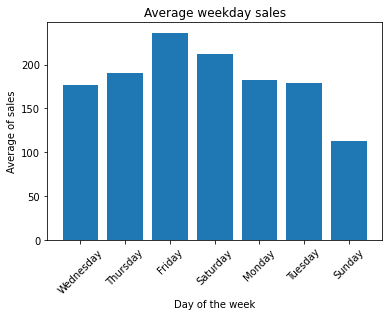

In [23]:
plt.bar(group1.mean().to_dict().keys(), group1.mean().to_dict().values())
plt.title('Average weekday sales')
plt.xlabel('Day of the week')
plt.ylabel('Average of sales')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Policzenie sredniej sprzedazy wedlug pory roku wraz z bar plotem:

group2 = result['bikes'].groupby(result['Pora roku'], sort=False)

In [25]:
group2.mean()

Pora roku
Winter    152.465116
Spring    223.523256
Summer    207.521739
Autumn    151.232558
Name: bikes, dtype: float64

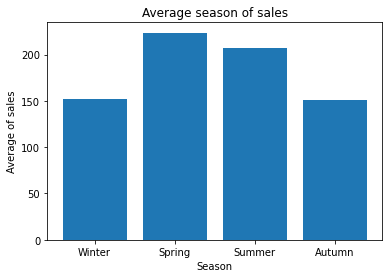

In [26]:
plt.bar(group2.mean().to_dict().keys(), group2.mean().to_dict().values())
plt.title('Average season of sales')
plt.xlabel('Season')
plt.ylabel('Average of sales')
plt.show()

In [27]:
group3 = result['bikes'].groupby(result['Miesiac'], sort=False)

In [28]:
group3.mean()

Miesiac
January      144.586207
February     156.250000
March        170.451613
April        208.214286
May          248.517241
June         230.607143
July         258.516129
August       210.206897
September    129.300000
October      161.533333
November     150.214286
December     139.517241
Name: bikes, dtype: float64

In [29]:
import numpy as np

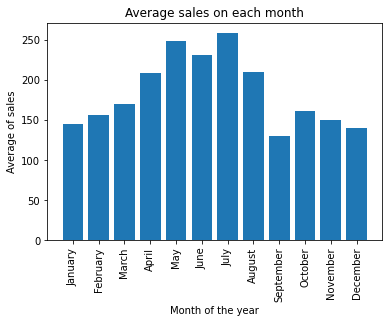

<Figure size 2880x2160 with 0 Axes>

In [30]:
plt.bar(group3.mean().to_dict().keys(), group3.mean().to_dict().values())
plt.title('Average sales on each month')
plt.xlabel('Month of the year')
plt.ylabel('Average of sales')
plt.xticks(result['Miesiac'].unique(), rotation=90 )
plt.figure(figsize=(40,30))
plt.show()

Wykonanie czwartej części.

In [31]:
group1.sum()

Dzien tygodnia
Wednesday     8662
Thursday      9152
Friday       11817
Saturday     10796
Monday        9313
Tuesday       8924
Sunday        5769
Name: bikes, dtype: int64

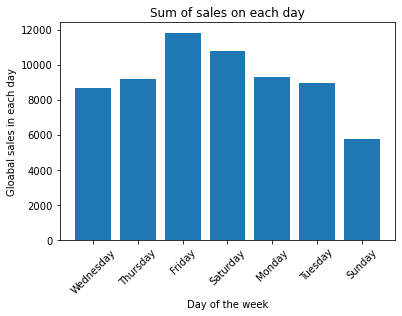

In [32]:
plt.bar(group1.sum().to_dict().keys(), group1.sum().to_dict().values())
plt.ylabel('Gloabal sales in each day')
plt.xlabel('Day of the week')
plt.title('Sum of sales on each day')
plt.xticks(rotation=45)
plt.show()

Na przestrzeni całego 2019 roku rowery najlepiej sprzedawały się w piątek (tj. łącznie 11817 sztuk). Drugim dniem z przekroczoną granicą 10 tys. sztuk jest kolejny dzień weekendu, tj. sobota. Analiza wykazuje, że najlepszymi dniami handlowymi były dwa pierwsze dni weekendu. Z pewnością miało to związek z dużą ilością czasu wolnego oraz z planami na ten czas wśród kupujących. Kolejne dni w zestawieniu - od poniedziałku do czwartku, mają globalnie dość zbliżony wolumen. Najgorzej wypada niedziela - globalny wynik jest poniżej poziomu 6 tysięcy sztuk.

Rozwiązanie piątej części zadania, wraz z wykresem szeregu czasowego i zaznaczeniem pięciu dni (czerwoną kropką), które miały w ciągu 2019 roku najlepsze wyniki sprzedaży.

In [33]:
a = pd.DataFrame(sorted(result[['date', 'bikes']].groupby(by=['bikes', 'date']), reverse=True)[:5])[0]

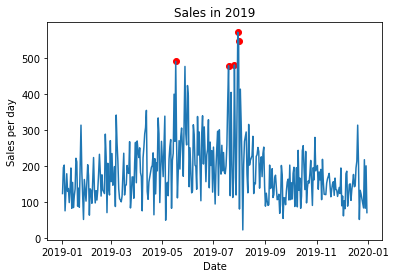

<Figure size 2160x2160 with 0 Axes>

In [34]:
plt.title('Sales in 2019')

for n in range(0, len(a)):
  plt.scatter(a[n][1], a[n][0], c='r')

plt.plot(result['date'], result['bikes'])
plt.ylabel('Sales per day')
plt.xlabel('Date')
plt.figure(figsize=(30,30))
plt.show()

W odpowiedzi na szóstą część zadania: 
Uważam, że w prognozowaniu przyszłej sprzedaży mogłyby być pomocne dane dotyczące czynników atmosferycznych - tj. średniej temperatury oraz średniej ilości opadów. Według mnie użytkownicy rowerów, dużo chętniej jeżdżą jednośladem, gdy jest ciepło oraz sucho. W prognozowaniu mogą być pomocne również informacje dotyczące demografii - według mnie społeczeństwo młodsze, częściej będzie wybierać ten środek transportu. Bardzo pomocnym czynnikiem może być również informacja na temat infrastruktury drogowej, a więc na przykład informacja na temat średniej długości ścieżek rowerowych. Owe trasy są gwarantem bezpieczeństwa dla rowerzystów, a więc jeśli ich sieć stale się powięszka, można domniemywać, że wzrastać będzie również popyt na ten środek transportu.